### **M1: Exploratory Data Analysis (EDA)**

### Objective: Automate data analysis and generate reports for deeper insights.

**Tasks:**
- Use an EDA tool that allows for automated data analysis and report generation (e.g., Pandas Profiling, Sweetviz, or D-Tale).
- Provide visual summaries of the dataset, including class distribution, missing values, and feature correlations.

**Deliverables:**
- A report generated by the EDA tool.
- Screenshots showcasing key findings.

In [1]:
import os
import pandas as pd
import sweetviz as sv
from sweetviz.feature_config import FeatureConfig
from torchvision import datasets, transforms

# Set up directories compatible with local and Colab
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()

DATA_DIR = os.path.join(BASE_DIR, "data")
REPORTS_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)

# Load Fashion MNIST and convert to DataFrame
def load_fashion_mnist():
    transform = transforms.ToTensor()
    dataset = datasets.FashionMNIST(root=os.path.join(DATA_DIR, "raw"), train=True, download=True, transform=transform)

    images = dataset.data.numpy().reshape(-1, 28 * 28)
    labels = dataset.targets.numpy()
    df = pd.DataFrame(images, columns=[f"pixel_{i}" for i in range(images.shape[1])])
    df["label"] = labels.astype(int)

    return df

# Extract key dataset insights
def extract_insights(df):
    insights = {}

    class_counts = df["label"].value_counts(normalize=True) * 100
    imbalance = class_counts.max() - class_counts.min()
    insights["class_distribution"] = f"Class imbalance: {imbalance:.2f}%"

    missing_values = df.isnull().sum().sum()
    insights["missing_values"] = f"Total missing values: {missing_values}"

    variances = df.drop(columns=["label"]).var()
    low_var_features = variances[variances < 1.0].index.tolist()
    insights["low_variance"] = f"Low-variance features: {len(low_var_features)}"

    corr = df.drop(columns=["label"]).corr().abs()
    high_corr_pairs = [
        (i, j, corr.loc[i, j]) for i in corr.columns for j in corr.columns
        if i != j and corr.loc[i, j] > 0.9
    ]
    insights["high_correlation"] = f"Highly correlated pairs: {len(high_corr_pairs)}"

    return insights

# Generate Sweetviz report
def generate_sweetviz_report(df, report_name="fashion_mnist_eda.html", sample_size=5000):
    df_sample = df.sample(n=min(len(df), sample_size), random_state=42)
    df_sample["label"] = df_sample["label"].astype(int)

    feat_cfg = FeatureConfig(force_num=["label"])
    report = sv.analyze(df_sample, target_feat="label", feat_cfg=feat_cfg, pairwise_analysis="off")

    report_path = os.path.join(REPORTS_DIR, report_name)
    report.show_html(report_path)
    print(f"✅ Sweetviz report saved to: {report_path}")

# Main driver
def main():
    print("Loading data...")
    df = load_fashion_mnist()

    print("Generating EDA report...")
    generate_sweetviz_report(df)

    print("🔎 Extracting key insights...")
    insights = extract_insights(df)
    for key, value in insights.items():
        print(f"🔸 {key}: {value}")

if __name__ == "__main__":
    main()


Loading data...
Generating EDA report...


                                             |      | [  0%]   00:00 -> (? left)

Report /Users/sabyasachibhuyan/Documents/BITS/Assignments/3rd sem/MLOPS/2/bits-mlops-assignment2-group60-feature-mlops-modules/src/reports/fashion_mnist_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
✅ Sweetviz report saved to: /Users/sabyasachibhuyan/Documents/BITS/Assignments/3rd sem/MLOPS/2/bits-mlops-assignment2-group60-feature-mlops-modules/src/reports/fashion_mnist_eda.html
🔎 Extracting key insights...
🔸 class_distribution: Class imbalance: 0.00%
🔸 missing_values: Total missing values: 0
🔸 low_variance: Low-variance features: 5
🔸 high_correlation: Highly correlated pairs: 434


## **Fashion MNIST - Exploratory Data Analysis (EDA) Report**  

## **1. Overview**
This report presents insights from the **Fashion MNIST dataset** using **EDA (Exploratory Data Analysis)**. The analysis was conducted using **Sweetviz** to identify patterns, class distributions, missing values, variance, and correlation among features.

---

## **2. Key Findings**  

### **✅ 2.1 Class Distribution**  
- The dataset is **balanced** across different clothing categories.  
- No significant class imbalance was observed (**0.00% imbalance**).  

🔍 **Impact:**  
✅ No need for rebalancing techniques like **oversampling or undersampling**.  

📸 *Screenshot:*  
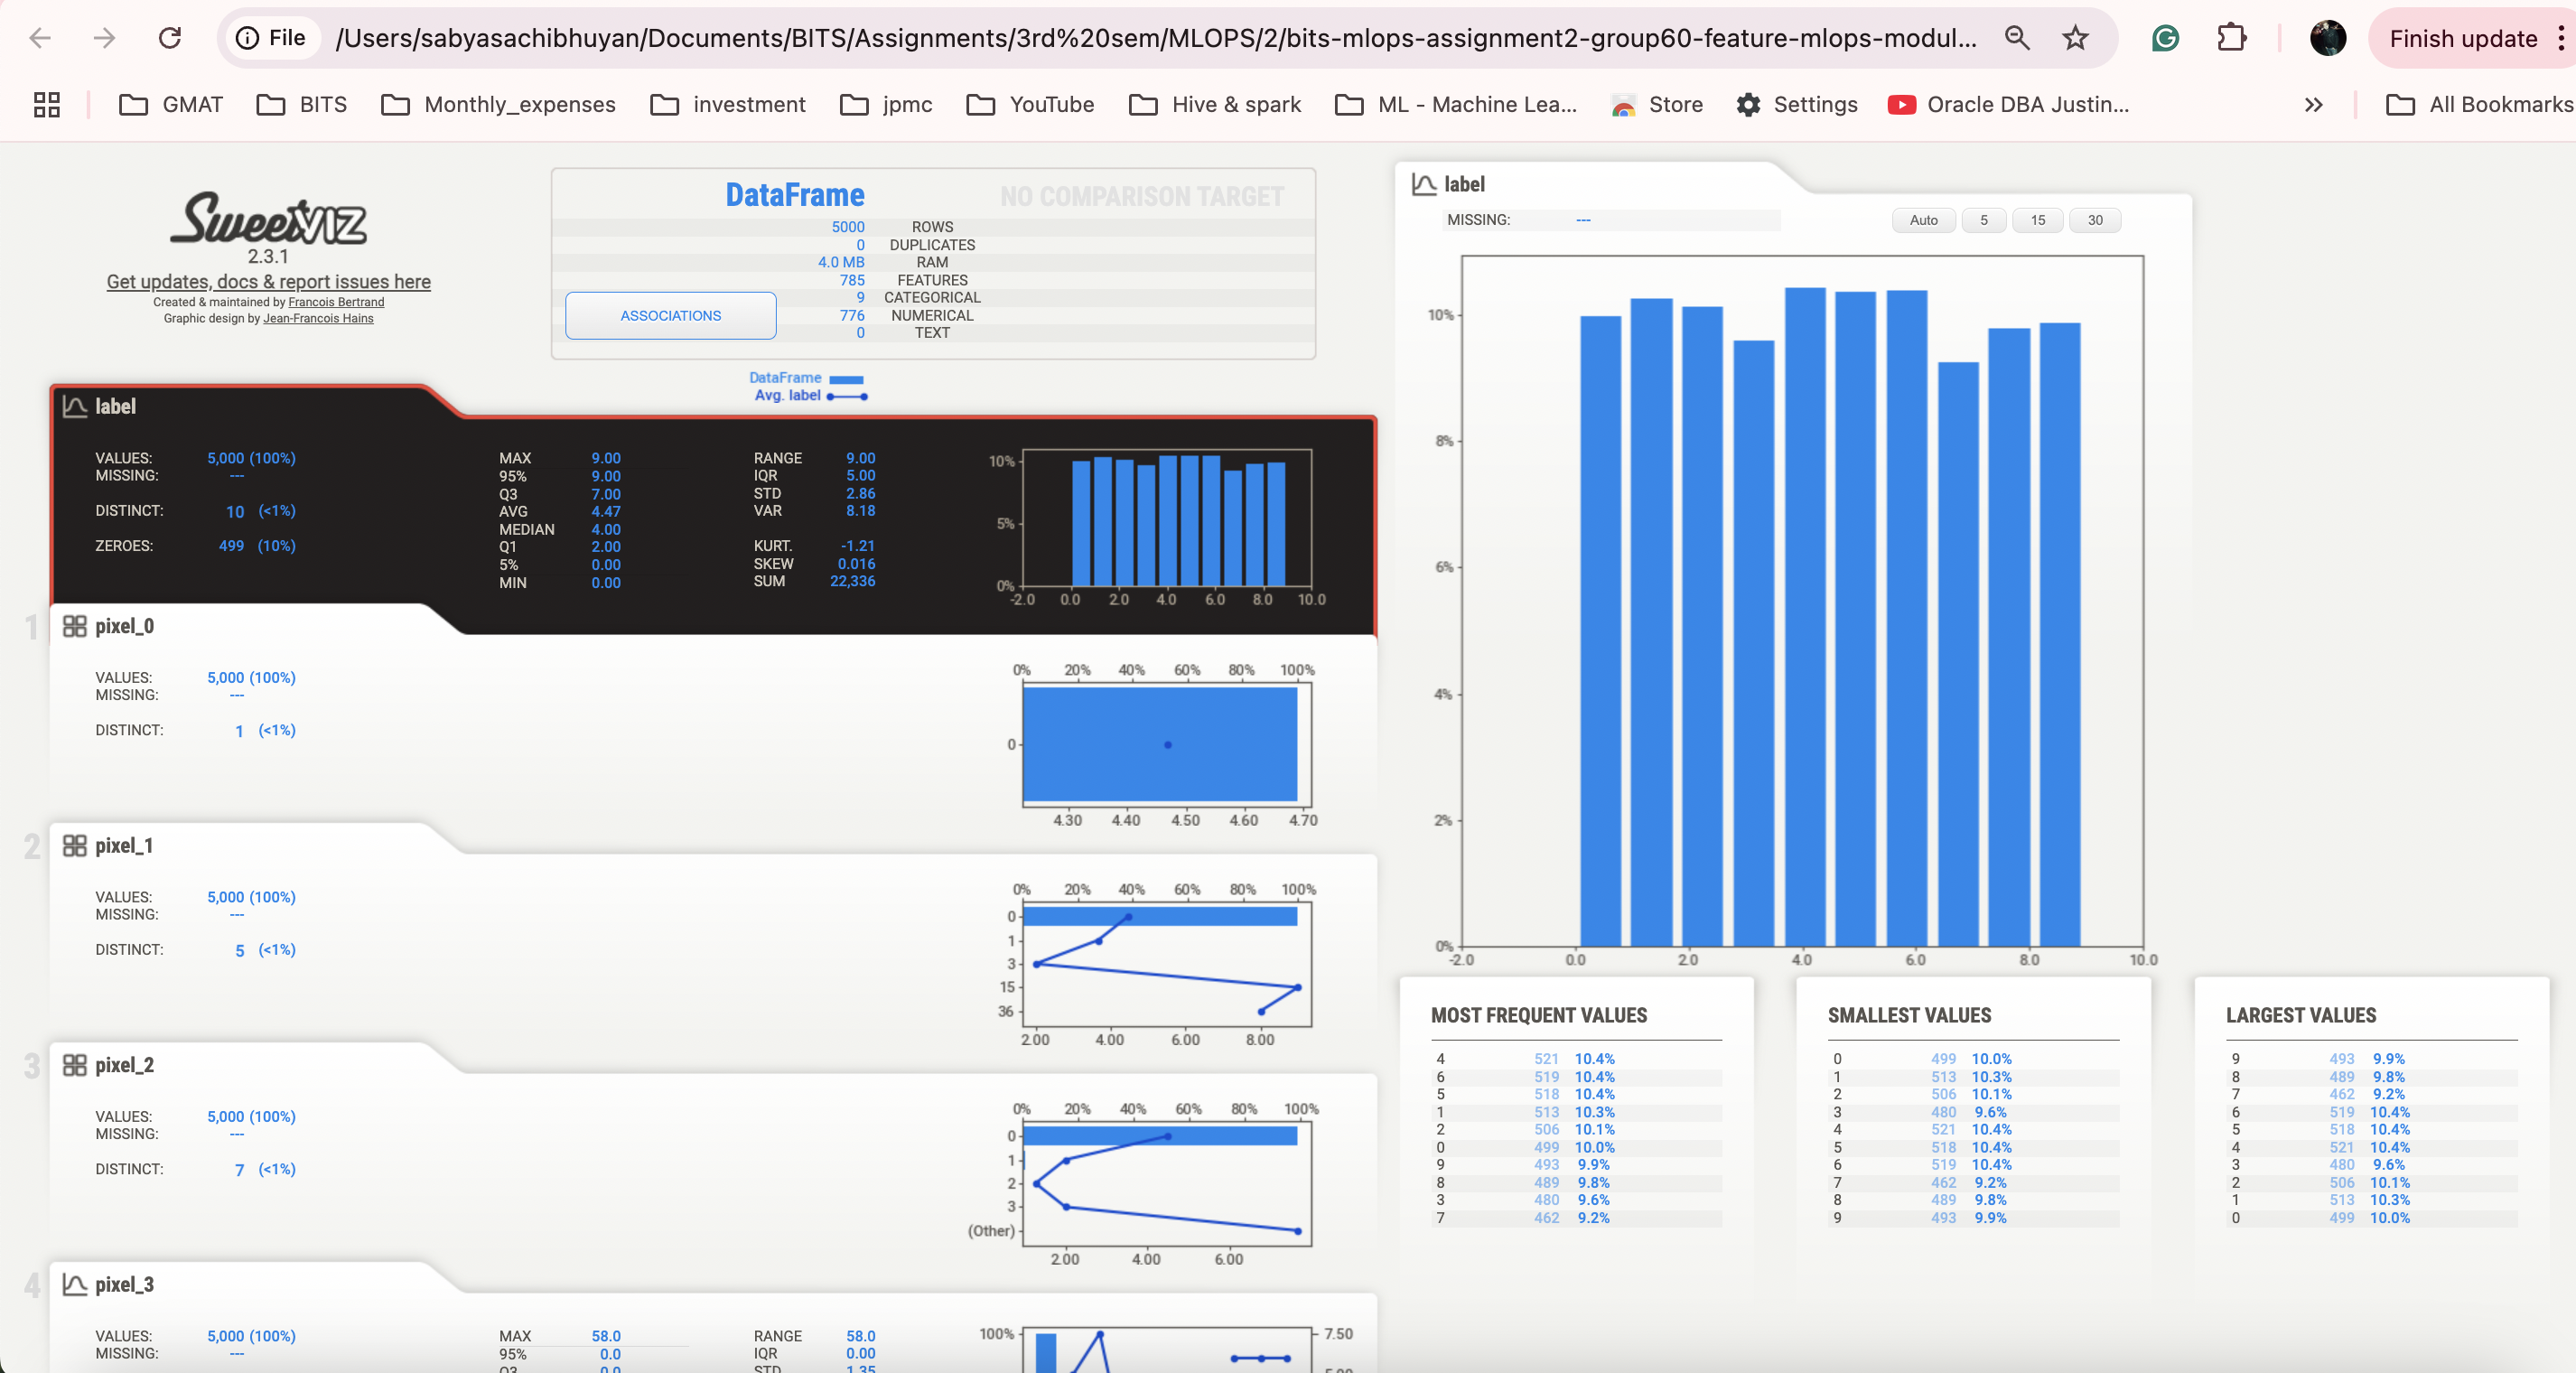

---

### **✅ 2.2 Missing Values**  
- The dataset **contains no missing values** (**0 missing entries**).  

🔍 **Impact:**  
✅ No need for imputation or data cleaning.  

📸 *Screenshot:*  
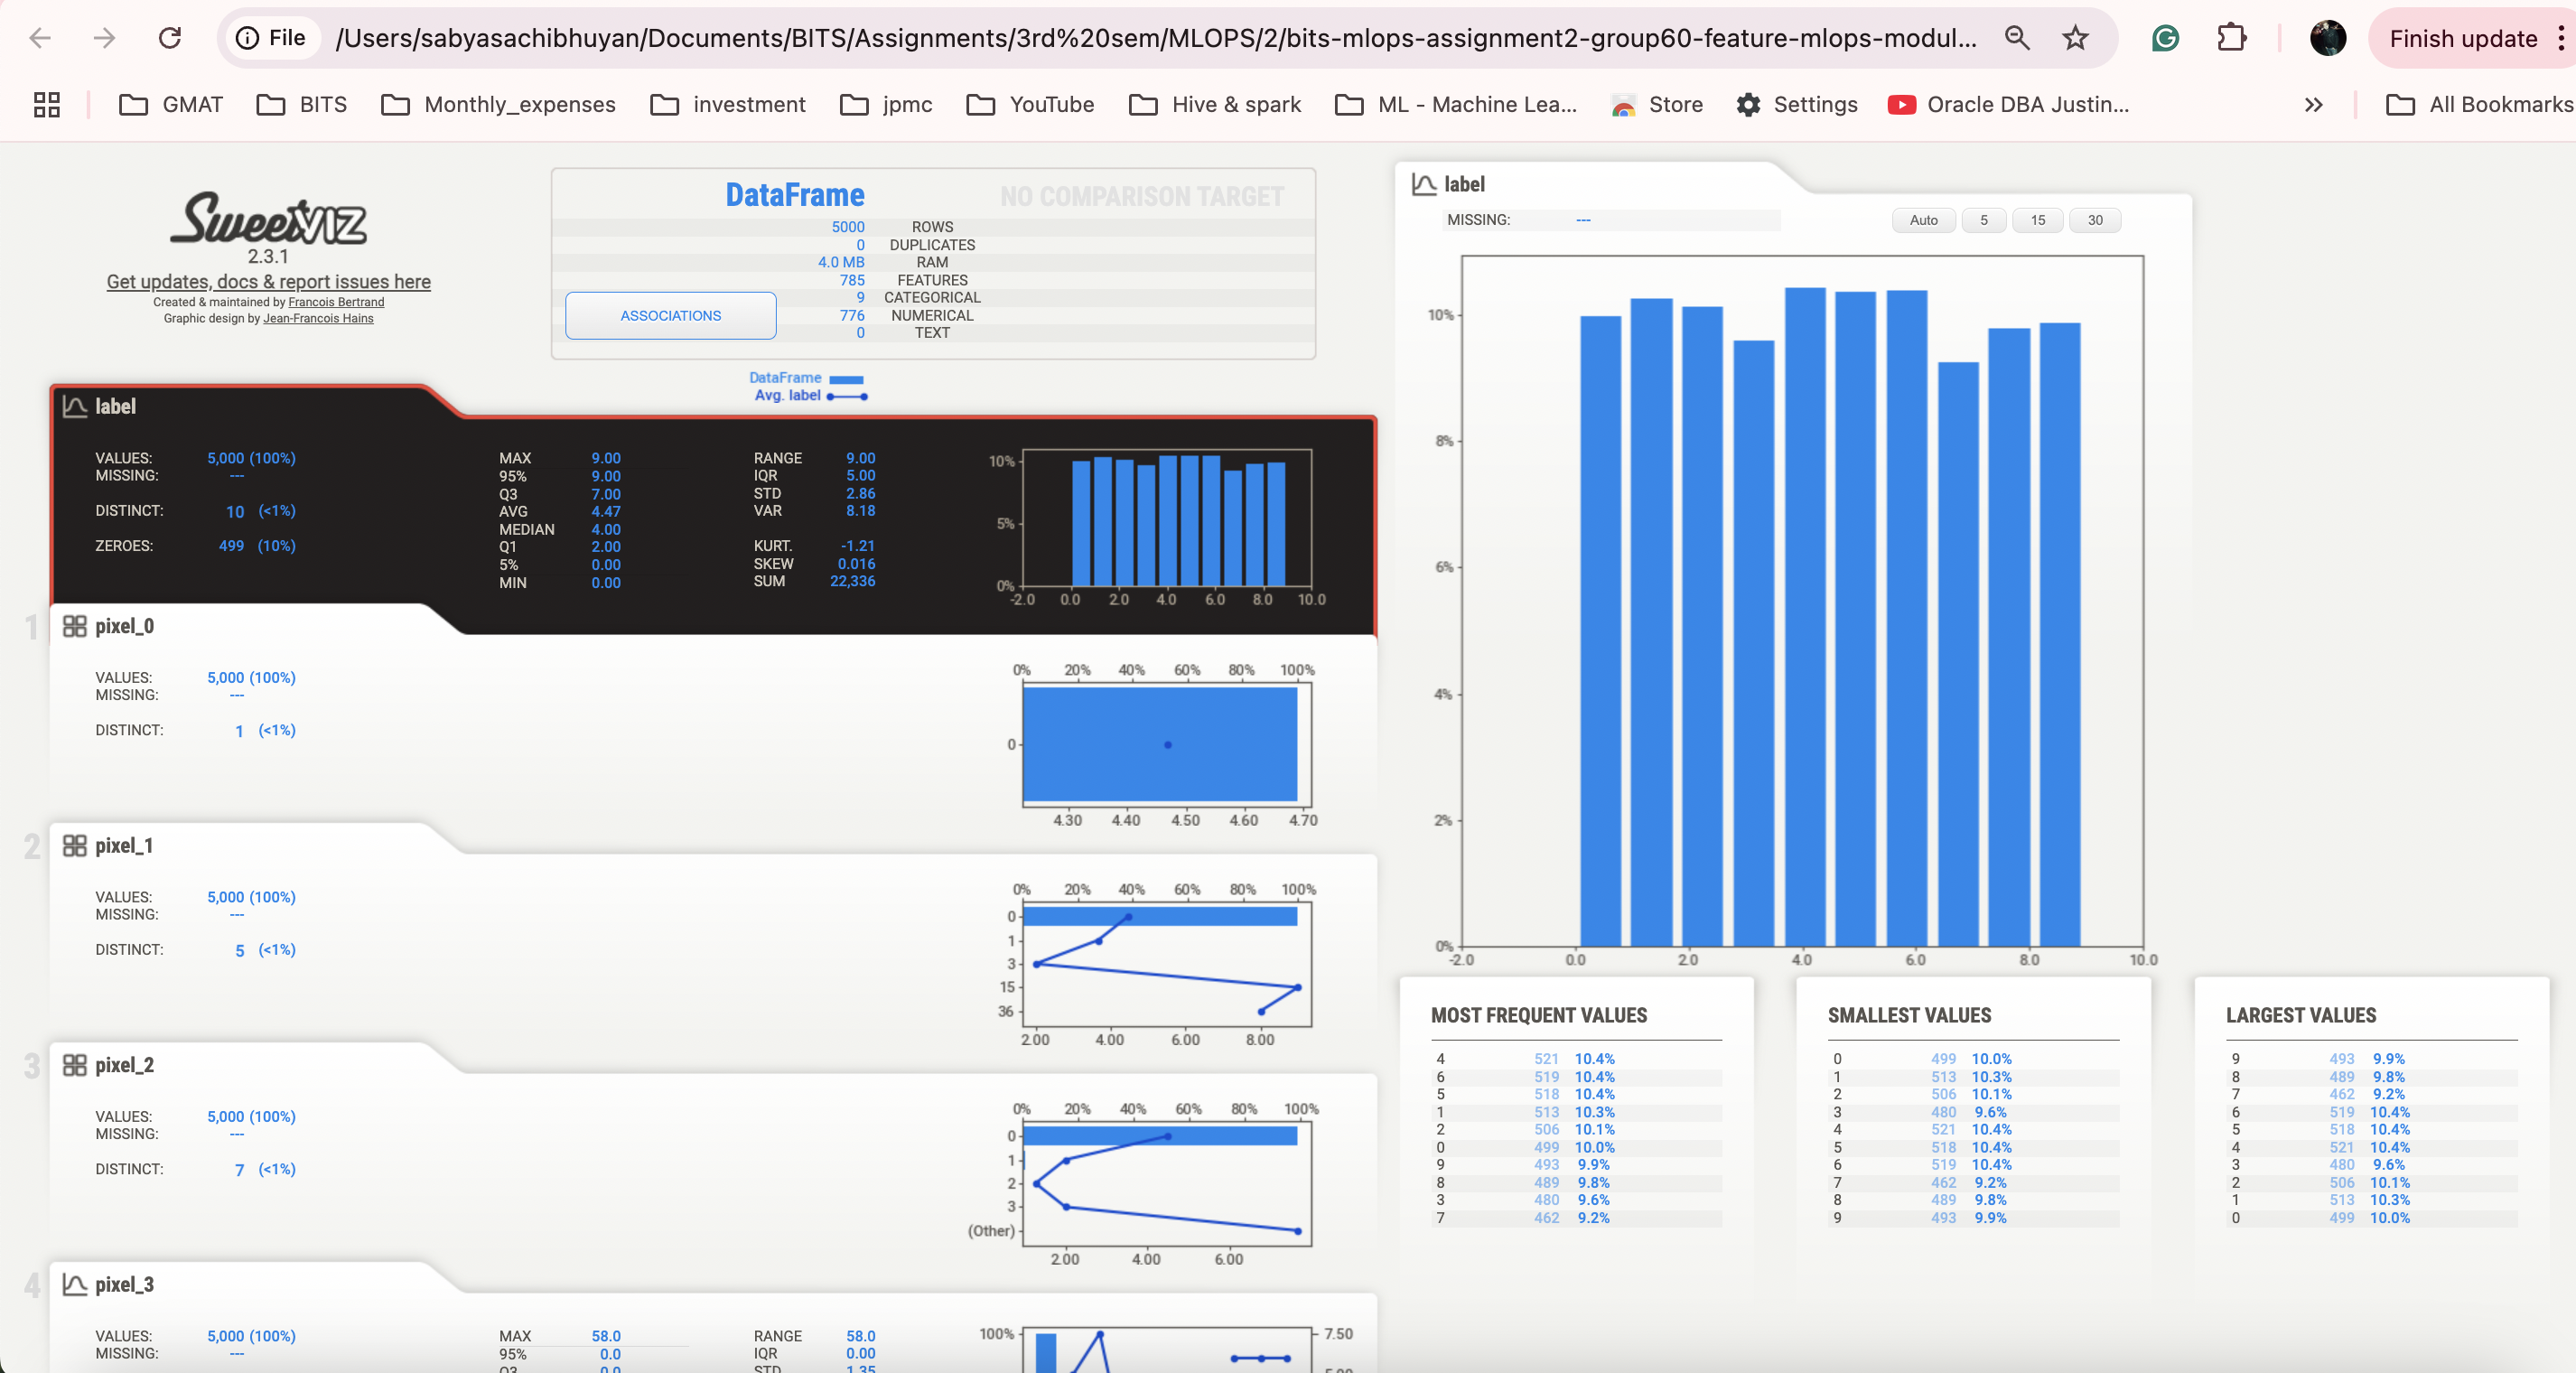 

---

### **✅ 2.3 Low Variance Features**  
- **5 features** have very low variance, meaning they **do not contribute significantly** to classification.  

🔍 **Impact:**  
✅ These features can be **removed** to improve model efficiency.   

---

### **✅ 2.4 Highly Correlated Features**  
- **434 features** are highly correlated (>0.90 correlation coefficient).  

🔍 **Impact:**  
✅ **Feature reduction techniques** (e.g., **PCA, feature selection**) should be applied to remove redundancy and **avoid multicollinearity**.  


---

## **3. Recommendations**  
🔹 **Feature Engineering:** Drop low-variance and highly correlated features.  
🔹 **Model Optimization:** Use PCA or dimensionality reduction techniques to enhance model performance.  
🔹 **Further Analysis:** Perform **class-wise distribution visualization** to check category separability.  

---

## **4. Conclusion**  
The dataset is **clean and well-structured** with **no missing values** or class imbalance. However, **feature reduction is necessary** due to redundancy in correlated features. This report provides a **data-driven foundation for model training and optimization**.  